<a href="https://colab.research.google.com/github/mmbs1989/DSWP-Aluno/blob/main/PMdarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 8.6MB/s 
     |████████████████████████████████| 9.5MB 22.7MB/s 
     |████████████████████████████████| 2.1MB 59.2MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [13]:
import pmdarima as pm
from pmdarima.arima import auto_arima
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostccdata.csv")
dfa = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostcca.csv")
df = df.drop(df.index[314:])
dfa = dfa.drop(dfa.index[314:])
df['a'] = dfa['a']
df['a'] = pd.to_numeric(df['a'])
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)

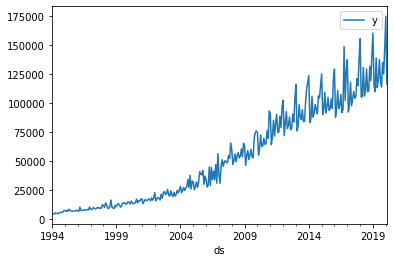

In [4]:
df.plot()

In [ ]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

(0.09233356415736649, True)

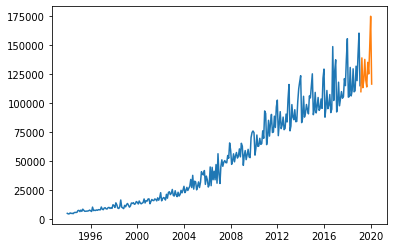

In [5]:
train = df.iloc[:-12].copy()  
test =  df.iloc[-12:].copy() 
plt.plot(train) 
plt.plot(test)

In [6]:
model = pm.auto_arima(train, start_p=0, d=1, start_q=0, max_p=5, max_q=5, max_d=5, start_P=0, D=1, start_Q=0, max_P=5, 
                      max_Q=5, max_D=5, seasonal= True, m= 12, error_action = 'warn', trace = True, supress_warnings=True, stepwise=True, 
                      random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5962.590, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5824.565, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5739.133, Time=0.91 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=5820.556, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=5739.762, Time=1.37 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=5758.648, Time=0.99 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=5759.663, Time=0.86 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=5733.419, Time=7.54 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=inf, Time=6.01 sec
 ARIMA(0,1,1)(1,1,3)[12]             : AIC=inf, Time=10.84 sec
 ARIMA(0,1,1)(0,1,3)[12]             : AIC=5756.308, Time=2.06 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=5758.940, Time=1.10 sec
 ARIMA(0,1,1)(2,1,3)[12]             : AIC=5759.136, Time=8.56 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=5891.847, Time=1.73 sec
 ARIMA(1,1,1)(1,1,2)[12]    

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  302
Model:             SARIMAX(0, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -2861.709
Date:                                 Tue, 02 Feb 2021   AIC                           5733.419
Time:                                         18:13:17   BIC                           5751.751
Sample:                                              0   HQIC                          5740.764
                                                 - 302                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8182      0.030    -27.561      0.000      -0.876      -0.760
ar.S.L12       0.9284      0.091     10.210      0.000       0.750       1.107
ma.S.L12      -1.5626      0.084    -18.511      0.000      -1.728      -1.397
ma.S.L24       0.6225      0.046     13.495      0.000       0.532       0.713
sigma2      2.201e+07   1.56e-08   1.41e+15      0.000     2.2e+07     2.2e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):              3667.85
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):              16.41   Skew:                             2.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  2e+30. Standard errors may be unstable.
"""

In [9]:
prediction = pd.DataFrame(model.predict(n_periods = 12), index = test.index)
prediction

,0
ds,
2019-03-01,114294.154753
2019-04-01,135748.017119
2019-05-01,114159.379529
2019-06-01,118812.396675
2019-07-01,131068.700063
2019-08-01,116623.553546
2019-09-01,117983.110154
2019-10-01,142961.746865
2019-11-01,127809.998198


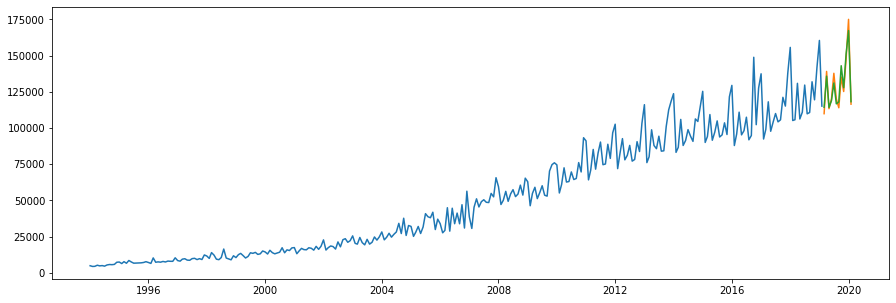

In [10]:
plt.figure(figsize=(15,5))
plt.plot(train, label= "Train")
plt.plot(test, label= 'Test')
plt.plot(prediction, label = 'Previsão')
plt.show()

In [22]:
from sklearn.metrics import r2_score
test['0'] = prediction
r2_score(test['y'], test['0'])

0.9360151188752727

In [24]:
test = test.drop(columns=['0'])
test

,y
ds,
2019-03-01,109854
2019-04-01,139030
2019-05-01,113278
2019-06-01,119946
2019-07-01,137735
2019-08-01,119951
2019-09-01,113933
2019-10-01,135202
2019-11-01,125161


In [25]:
print(f'RMSE= {mean_squared_error(test, prediction)}')

RMSE= 20518345.85028929
